In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("sample.csv")

In [3]:
df.head()

,Roll No.,Physics,Chemistry,Maths,Computer
0,1,56.0,57.0,58.0,59.0
1,2,23.0,24.0,25.0,26.0
2,3,89.0,25.0,26.0,27.0
3,4,45.0,26.0,27.0,28.0
4,5,23.0,27.0,28.0,29.0


In [4]:
df.describe()

,Roll No.,Physics,Chemistry,Maths,Computer
count,30.000000,27.000000,26.000000,28.00000,29.000000
mean,15.500000,52.814815,34.884615,34.50000,38.517241
std,8.803408,20.382944,13.650866,13.19231,14.917920
min,1.000000,12.000000,13.000000,14.00000,15.000000
25%,8.250000,45.000000,24.250000,24.75000,26.000000
50%,15.500000,51.000000,35.500000,34.50000,43.000000
75%,22.750000,56.500000,46.750000,46.25000,50.000000
max,30.000000,90.000000,57.000000,58.00000,66.000000


In [5]:
def calculate_statistics(data):
    statistics = {
        'mean': data.mean(),
        'median': data.median(),
        'mode': data.mode().iloc[0],  # mode might return multiple values
        'std_dev': data.std(),
        'correlation': data.corr()
    }
    return statistics

def histogram(data, column):
    plt.hist(data[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def scatter_plot(data, column1, column2):
    plt.scatter(data[column1], data[column2])
    plt.title(f'Scatter Plot of {column1} vs {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

def line_plot(data, column):
    plt.plot(data[column])
    plt.title(f'Line Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

In [6]:
data = str(calculate_statistics(df))
data

"{'mean': Roll No.     15.500000\nPhysics      52.814815\nChemistry    34.884615\nMaths        34.500000\nComputer     38.517241\ndtype: float64, 'median': Roll No.     15.5\nPhysics      51.0\nChemistry    35.5\nMaths        34.5\nComputer     43.0\ndtype: float64, 'mode': Roll No.      1.0\nPhysics      45.0\nChemistry    13.0\nMaths        14.0\nComputer     43.0\nName: 0, dtype: float64, 'std_dev': Roll No.      8.803408\nPhysics      20.382944\nChemistry    13.650866\nMaths        13.192310\nComputer     14.917920\ndtype: float64, 'correlation':            Roll No.   Physics  Chemistry     Maths  Computer\nRoll No.   1.000000  0.026508   0.460965  0.451501  0.690104\nPhysics    0.026508  1.000000   0.176808 -0.017761  0.048506\nChemistry  0.460965  0.176808   1.000000  0.999671  0.860923\nMaths      0.451501 -0.017761   0.999671  1.000000  0.863882\nComputer   0.690104  0.048506   0.860923  0.863882  1.000000}"

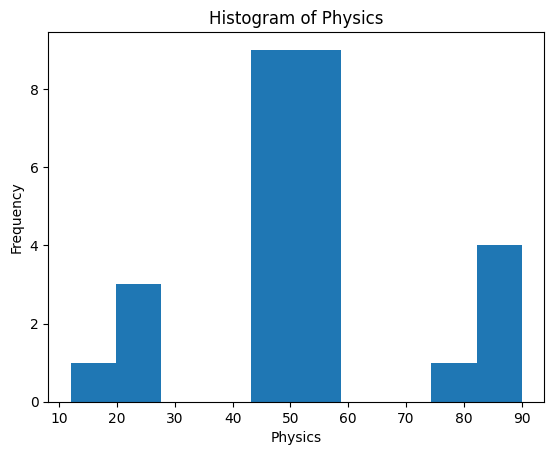

In [7]:
histogram(df,'Physics')

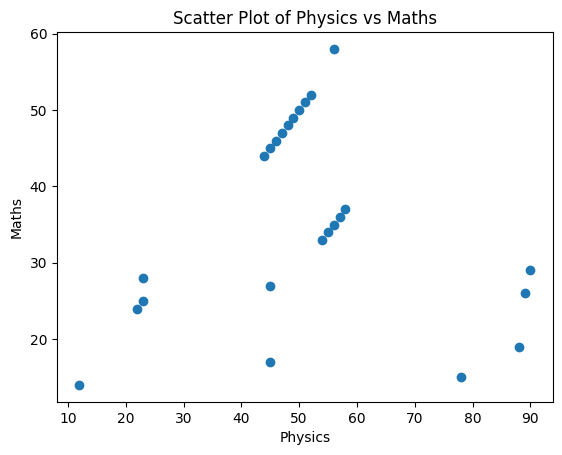

In [8]:
scatter_plot(df,'Physics','Maths')

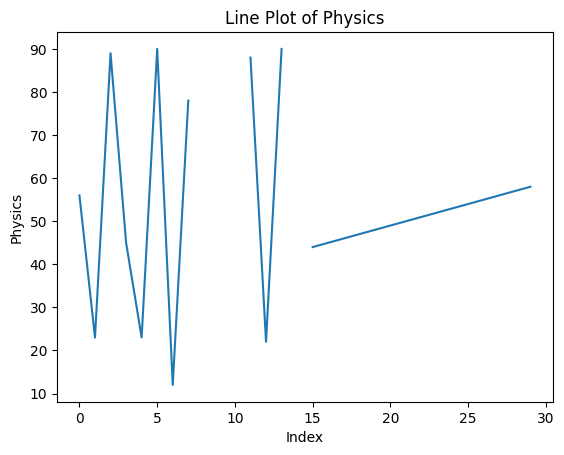

In [9]:
line_plot(df,'Physics')

In [10]:
import os 
import openai 
from getpass import getpass
from langchain_openai import OpenAI
from langchain_openai import ChatOpenAI
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage

In [11]:
os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API key: ")
openai.api_key=os.getenv("OPENAI_API_KEY")

In [12]:
llm_model = "gpt-3.5-turbo"
prompt = data
messages = [HumanMessage(content=prompt)]
chat_model = ChatOpenAI(temperature=0.7) 
response=chat_model.invoke(messages)
print(type(response))
print(response)

c:\Users\sohil\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


<class 'langchain_core.messages.ai.AIMessage'>
content='Here are some statistical measures for the given data:\n\nMean:\n- Physics: 52.81\n- Chemistry: 34.88\n- Maths: 34.50\n- Computer: 38.52\n\nMedian:\n- Physics: 51.0\n- Chemistry: 35.5\n- Maths: 34.5\n- Computer: 43.0\n\nMode:\n- Physics: 45.0\n- Chemistry: 13.0\n- Maths: 14.0\n- Computer: 43.0\n\nStandard Deviation:\n- Physics: 20.38\n- Chemistry: 13.65\n- Maths: 13.19\n- Computer: 14.92\n\nCorrelation:\n- Strong positive correlation between Roll No. and Physics, Chemistry, Maths, and Computer\n- Weak positive correlation between Physics and Computer\n- Strong positive correlation between Chemistry and Maths, Chemistry and Computer, and Maths and Computer' response_metadata={'token_usage': {'completion_tokens': 195, 'prompt_tokens': 390, 'total_tokens': 585}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-3f37accd-8202-4792-a8a1-c60a0a6196d3-0'


In [13]:
response.content

'Here are some statistical measures for the given data:\n\nMean:\n- Physics: 52.81\n- Chemistry: 34.88\n- Maths: 34.50\n- Computer: 38.52\n\nMedian:\n- Physics: 51.0\n- Chemistry: 35.5\n- Maths: 34.5\n- Computer: 43.0\n\nMode:\n- Physics: 45.0\n- Chemistry: 13.0\n- Maths: 14.0\n- Computer: 43.0\n\nStandard Deviation:\n- Physics: 20.38\n- Chemistry: 13.65\n- Maths: 13.19\n- Computer: 14.92\n\nCorrelation:\n- Strong positive correlation between Roll No. and Physics, Chemistry, Maths, and Computer\n- Weak positive correlation between Physics and Computer\n- Strong positive correlation between Chemistry and Maths, Chemistry and Computer, and Maths and Computer'

In [18]:
question = input()

In [19]:
messages.append(HumanMessage(content=question))
response=chat_model.invoke(messages)
print(response.content)

The mode of a dataset is the value that appears most frequently. In this case, the mode of the Physics scores would be 45.0.

The mean of Physics scores is 52.814815.
